# Clustering with the Iris Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from pydataset import data

In [2]:
df = data('iris')
df.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


## Using this lesson as a guide, perform clustering on the iris dataset.

- Choose features other than the ones used in the lesson.
- Visualize the results of your clustering.
- Use the elbow method to visually select a good value for k.
- Repeat the clustering, this time with 3 different features.
- Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

### Choose features

In [3]:
df = pd.get_dummies(df, columns=['Species'])
df.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_setosa,Species_versicolor,Species_virginica
1,5.1,3.5,1.4,0.2,1,0,0
2,4.9,3.0,1.4,0.2,1,0,0
3,4.7,3.2,1.3,0.2,1,0,0


In [4]:
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.25, random_state=123)
train.shape, validate.shape, test.shape

((90, 7), (30, 7), (30, 7))

In [5]:
kmeans = KMeans(n_clusters=3, random_state=123)

In [6]:
kmeans.fit(train[['Sepal.Length','Sepal.Width']])

KMeans(n_clusters=3, random_state=123)

In [7]:
train['sepal_cluster'] = kmeans.predict(train[['Sepal.Length','Sepal.Width']])
train.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_setosa,Species_versicolor,Species_virginica,sepal_cluster
87,6.7,3.1,4.7,1.5,0,1,0,0
83,5.8,2.7,3.9,1.2,0,1,0,2
110,7.2,3.6,6.1,2.5,0,0,1,0


### Visualize Clusters

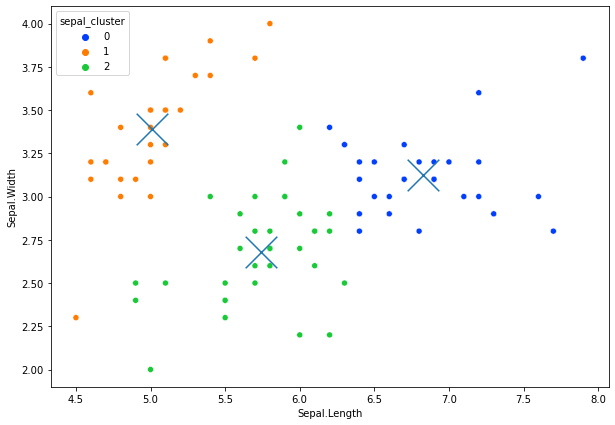

In [8]:
centroids = train.groupby('sepal_cluster')['Sepal.Length','Sepal.Width'].mean()
plt.figure(figsize=(10,7))
sns.scatterplot(data=train, x='Sepal.Length', y='Sepal.Width', hue='sepal_cluster', palette='bright')
centroids.plot.scatter(x='Sepal.Length', y='Sepal.Width', marker='x', s=1000, ax=plt.gca())
plt.show()

### Elbow Method to Select K

#### Generating cluster iterations

In [9]:
k = 2
kmeans2 = KMeans(n_clusters=k, random_state=123)
kmeans2.fit(train[['Sepal.Length','Sepal.Width']])
inertia_2 = kmeans.inertia_

In [10]:
inertia_3 = kmeans.inertia_

In [11]:
k = 4
kmeans4 = KMeans(n_clusters=k, random_state=123)
kmeans4.fit(train[['Sepal.Length','Sepal.Width']])
inertia_4 = kmeans4.inertia_

In [12]:
k = 5
kmeans5 = KMeans(n_clusters=k, random_state=123)
kmeans5.fit(train[['Sepal.Length','Sepal.Width']])
inertia_5 = kmeans5.inertia_

In [13]:
k = 6
kmeans6 = KMeans(n_clusters=k, random_state=123)
kmeans6.fit(train[['Sepal.Length','Sepal.Width']])
inertia_6 = kmeans6.inertia_

In [14]:
k = 7
kmeans7 = KMeans(n_clusters=k, random_state=123)
kmeans7.fit(train[['Sepal.Length','Sepal.Width']])
inertia_7 = kmeans7.inertia_

In [15]:
k = 8
kmeans8 = KMeans(n_clusters=k, random_state=123)
kmeans8.fit(train[['Sepal.Length','Sepal.Width']])
inertia_8 = kmeans8.inertia_

#### Plotting cluster iterations

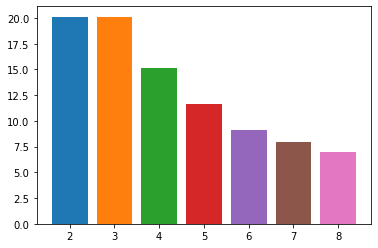

In [16]:
inertias = [inertia_2, inertia_3, inertia_4, inertia_5, inertia_6, inertia_7, inertia_8]
for i, inertia in enumerate(inertias):
    plt.bar(i + 2, inertia)

I'll say the 'elbow' is 5, so let's plot with 5 clusters

#### Plotting with 5 clusters

In [17]:
train['sepal_cluster5'] = kmeans5.predict(train[['Sepal.Length','Sepal.Width']])

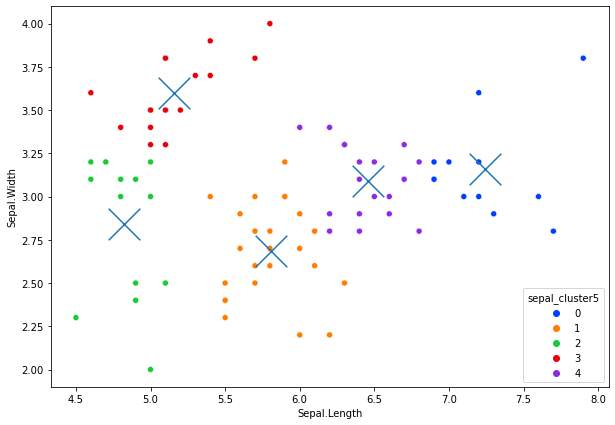

In [18]:
centroids = train.groupby('sepal_cluster5')['Sepal.Length','Sepal.Width'].mean()
plt.figure(figsize=(10,7))
sns.scatterplot(data=train, x='Sepal.Length', y='Sepal.Width', hue='sepal_cluster5', palette='bright')
centroids.plot.scatter(x='Sepal.Length', y='Sepal.Width', marker='x', s=1000, ax=plt.gca())
plt.show()

### Use 3 Features, Cluster, Plot

In [19]:
kmeans_tri = KMeans(n_clusters=3, random_state=123)
kmeans_tri.fit(train[['Sepal.Length','Sepal.Width','Petal.Length']])
train['tri_cluster'] = kmeans_tri.predict(train[['Sepal.Length','Sepal.Width','Petal.Length']])

In [20]:
train.groupby('tri_cluster')['Petal.Length'].mean().items

<bound method Series.items of tri_cluster
0    4.348718
1    5.650000
2    1.477778
Name: Petal.Length, dtype: float64>

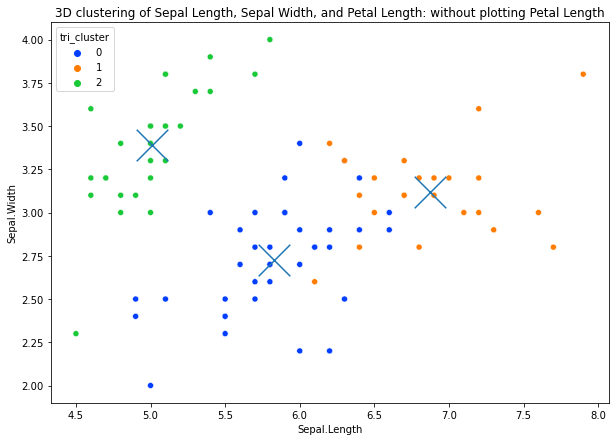

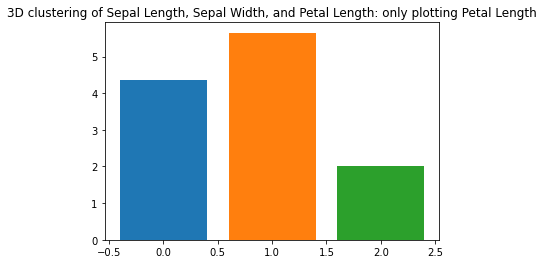

In [21]:
centroids_tri_sepal = train.groupby('tri_cluster')['Sepal.Length','Sepal.Width'].mean()
plt.figure(figsize=(10,7))
sns.scatterplot(data=train, x='Sepal.Length', y='Sepal.Width', hue='tri_cluster', palette='bright')
centroids_tri_sepal.plot.scatter(x='Sepal.Length', y='Sepal.Width', marker='x', s=1000, ax=plt.gca())
plt.title('3D clustering of Sepal Length, Sepal Width, and Petal Length: without plotting Petal Length')
plt.show()
for i, length in enumerate(train.groupby('tri_cluster')['Petal.Length'].mean().items()):
    plt.bar(i, length)
plt.title('3D clustering of Sepal Length, Sepal Width, and Petal Length: only plotting Petal Length')
plt.show()

## How does scaling impact the results of clustering?

- Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

## Bonus
1. Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing
2. Visualize the data and guess the number and shape of the clusters.
3. Implement the KMeans algorithm on unscaled data and visualize the clusters.
4. Repeat the step above but with scaled data. 
5. Write down the takeaways from this exercise.